In [38]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns
import cbsodata

#load the data from CBS, this might take a while..
buurt_data_14 = pd.DataFrame(cbsodata.get_data("82931NED"))
buurt_data_15 = pd.DataFrame(cbsodata.get_data("83220NED"))
buurt_data_16 = pd.DataFrame(cbsodata.get_data("83487NED"))
buurt_data_17 = pd.DataFrame(cbsodata.get_data("83765NED"))
buurt_data_18 = pd.DataFrame(cbsodata.get_data("84286NED"))
buurt_data_19 = pd.DataFrame(cbsodata.get_data("84583NED"))
education_17 = pd.read_csv("data/education17.csv",sep=";",decimal=",")

In [39]:
dh_buurt_data_17 = buurt_data_17[(buurt_data_17["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_17["SoortRegio_2"]=="Buurt     ")]

In [40]:
dh_buurt_data_17.head(3)

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,...,OppervlakteTotaal_99,OppervlakteLand_100,OppervlakteWater_101,MeestVoorkomendePostcode_102,Dekkingspercentage_103,MateVanStedelijkheid_104,Omgevingsadressendichtheid_105,TotaalDiefstalUitWoningSchuurED_106,VernielingMisdrijfTegenOpenbareOrde_107,GeweldsEnSeksueleMisdrijven_108
5814,5814,Oostduinen,'s-Gravenhage,Buurt,BU05180170,1,0,0,0,0,...,318,308,10,2597,4.0,4.0,681.0,NaN,NaN,NaN
5816,5816,Belgisch Park,'s-Gravenhage,Buurt,BU05180271,1,8145,4025,4120,1225,...,102,102,0,2587,2.0,2.0,2438.0,3.0,7.0,9.0
5818,5818,Westbroekpark,'s-Gravenhage,Buurt,BU05180373,1,845,375,465,100,...,46,41,5,2597,3.0,2.0,2075.0,7.0,12.0,12.0


In [41]:
education_17

,Wijk,Wijkcode,Buurt,Buurtcode,bevolking,dekkingsgraad,Laag,RSF_Laag,Middelbaar,RSF_Middelbaar,Hoog,RSF_Hoog
0,NaN,NaN,NaN,NaN,405985,68.0,32.7,1.5,35.8,1.2,31.4,1.7
1,Wijk 01 Oostduinen ...,1.0,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,1.0,Oostduinen ...,70.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Wijk 02 Belgisch Park ...,2.0,NaN,NaN,6295,60.5,17.1,7.3,37.5,6.3,45.4,5.6
4,NaN,2.0,Belgisch Park ...,71.0,6295,60.5,17.1,7.3,37.5,6.3,45.4,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Wijk 44 Leidschenveen ...,44.0,NaN,NaN,15120,67.0,26.7,3.3,38.3,2.7,35.1,3.2
155,NaN,44.0,De Lanen ...,18.0,3660,68.2,28.6,5.9,39.9,4.6,31.4,5.1
156,NaN,44.0,De Velden ...,19.0,3255,64.0,25.4,8.0,32.5,7.2,42.1,7.7
157,NaN,44.0,De Vissen ...,20.0,6360,66.3,26.4,4.9,39.8,3.9,33.8,4.5


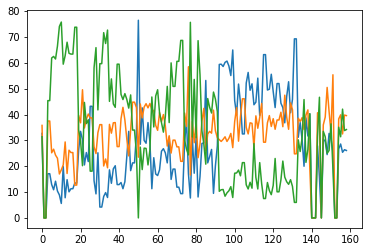

In [45]:
plt.plot(education_17[["Laag","Middelbaar","Hoog"]])